## `EERIE` difficulty ranking

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('wordle_data.xlsx',header=1)
#drop multiple columns by name
data = df.drop(columns=['is_holiday', 'Percent of number in hard mode divide number of reported results', 'Number of repetitive morphemes'])
tmp = data.iloc[-1]
data.loc[len(data)] = tmp

# reverse the order of rows
data = data.iloc[::-1]
data = data.reset_index(drop=True)

#get the number of columns
r_eerie = len(data)-1
WIDTH = len(data.columns)
for i in range(WIDTH):
	data.iloc[r_eerie,i] = np.nan
data.iloc[r_eerie,0] = '2023-03-01'
data.iloc[r_eerie,2] = 'eerie'

In [2]:
data.columns

Index(['Date', 'Word', 'Number of  reported results', 'Number in hard mode',
       '1 try', '2 tries', '3 tries', '4 tries', '5 tries', '6 tries',
       '7 or more tries (X)', 'sum of frequencies of letters in word',
       'Number of repetitive letter', 'word possibility'],
      dtype='object')

In [3]:
# possibility of each letter from A to Z
F = [159, 31, 71, 54, 187, 33, 51, 70, 103, 4, 35, 112, 55, 88, 133, 64, 5, 135, 88, 130, 64, 25, 30, 7, 61, 5]
P = [0.0883333333333333, 0.0172222222222222, 0.0394444444444444, 0.03, 0.103888888888889, 0.0183333333333333, 0.0283333333333333, 0.0388888888888889, 0.0572222222222222, 0.00222222222222222, 0.0194444444444444, 0.0622222222222222, 0.0305555555555556, 0.0488888888888889, 0.0738888888888889, 0.0355555555555556, 0.00277777777777778, 0.075, 0.0488888888888889, 0.0722222222222222, 0.0355555555555556, 0.0138888888888889, 0.0166666666666667, 0.00388888888888889, 0.0338888888888889, 0.00277777777777778]
def letter_to_ascii(letter):
	return ord(letter.lower()) - 97



In [4]:


word_list = data.loc[:,'Word'].values.tolist()
prob_list = []
freq_list = []
for word in word_list:
	# calculate its probability
	word = str(word)
	prob = 1
	freq = 0
	for i in range(len(word)):
		freq += F[letter_to_ascii(word[i])]
		prob *= P[letter_to_ascii(word[i])]
	prob_list.append(prob)
	freq_list.append(freq)

# assign prob_list to the data.loc['word possibility']
data.loc[:,'word possibility'] = prob_list

# save it to a new csv
# data.to_csv('wordle_Q3.csv',index=False)

In [5]:
import enchant
d = enchant.Dict("en_US")

In [6]:
# plot bar chart from column 6-12, 
fig, ax = plt.subplots(figsize=(100, 100)), 
ax.set_xticklabels([]), 
data.iloc[:,6:12].plot(kind='bar', stacked=True, ax=ax, color=['#FF0000','#FFA500','#FFFF00','#008000','#0000FF','#4B0082','#EE82EE']), 
# hide x coordinate

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
# Count letters frequency from A to Z, 
, 


# Clutstering, 
## K-means

In [ ]:
# define dataset, 
# get header of data, 
header = data.columns, 
header

Index(['Date', 'Contest number', 'Word', 'Number of  reported results',
       'Number in hard mode', '1 try', '2 tries', '3 tries', '4 tries',
       '5 tries', '6 tries', '7 or more tries (X)', 'is_holiday',
       'Percent of number in hard mode divide number of reported results',
       'word frequency', 'sum of frequencies of letters in word',
       'Number of repetitive letter', 'Number of repetitive morphemes'],
      dtype='object')

In [ ]:
# Selected columns from known headers : '1 try', '2 tries', '3 tries', 
data = data[['1 try','2 tries','3 tries', '4 tries', '5 tries', '6 tries', '7 or more tries (X)',]]

/home/franktudor/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_12038/1848266244.py:29: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  index = where(dbscan_result == dbscan_clusters)


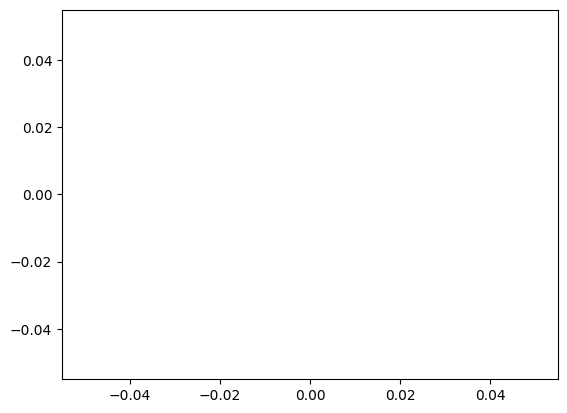

In [ ]:
from numpy import unique, 
from numpy import where, 
from matplotlib import pyplot, 
from sklearn.datasets import make_classification, 
from sklearn.cluster import KMeans, 
, 
, 
, 
# define the model, 
kmeans_model = KMeans(n_clusters=2), 
, 
# assign each data point to a cluster, 
dbscan_result = kmeans_model.fit_predict(training_data), 
, 
# get all of the unique clusters, 
dbscan_clusters = unique(dbscan_result), 
, 
# plot the DBSCAN clusters, 
for dbscan_cluster in dbscan_clusters:, 
    # get data points that fall in this cluster, 
    index = where(dbscan_result == dbscan_clusters), 
    # make the plot, 
    pyplot.scatter(training_data[index, 0], training_data[index, 1]), 
, 
# show the DBSCAN plot, 
pyplot.show()